# **Feature Selection**

# **Wrapper Method**
## Recursive Feature Elimination with Automatic Tuning of the number of Features Selected with Cross-validation.

In [1]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

### Create Synthetic Data for Classification

In [2]:
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

### Recursive Feature Elimination with Automatic Tuning of the number of Features Selected with Cross-validation.


Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. 

First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a **coef_ attribute** or through a **feature_importances_** attribute. 

Then, the least important features are pruned from current set of features.

That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

RFECV performs RFE in a cross-validation loop to find the optimal number of features.

In [3]:
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")

# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                    coef0=0.0, decision_function_shape='ovr', degree=3,
                    gamma='scale', kernel='linear', max_iter=-1,
                    probability=False, random_state=None, shrinking=True,
                    tol=0.001, verbose=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [4]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 3


In [5]:
# The mask of selected features.
# support_array of shape [n_features]

rfecv.support_

array([False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False])

In [7]:
# The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. 
# Selected (i.e., estimated best) features are assigned rank 1.
# ranking_array of shape [n_features]
rfecv.ranking_

array([ 5,  1, 12, 19, 15,  6, 17,  1,  2, 21, 23, 11, 16, 10, 13, 22,  8,
       14,  1, 20,  7,  9,  3,  4, 18])

In [ ]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Feature Selection using SelectFromModel and LassoCV

Use SelectFromModel meta-transformer along with Lasso to select the best couple of features from the diabetes dataset.

Since the **L1 norm promotes sparsity of features** we might be interested in selecting only a subset of the most interesting features from the dataset. 

This example shows how to select two the most interesting features from the diabetes dataset.


**Diabetes dataset** consists of 10 variables (features) collected from 442 diabetes patients. 

This example shows how to use SelectFromModel and LassoCv to find the best two features predicting disease progression after one year from the baseline.

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

## Load Diabetes Dataset

First, let’s load the diabetes dataset which is available from within sklearn. 

Then, we will look what features are collected for the diabates patients:


In [9]:
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

feature_names = diabetes.feature_names
print(feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


## Find Importance of the Features

To decide on the importance of the features we are going to use **LassoCV** estimator. 

The features with the highest absolute coef_ value are considered the most important

In [10]:
clf = LassoCV().fit(X, y)
importance = np.abs(clf.coef_)

print(importance)

[  6.49684455 235.99640534 521.73854261 321.06689245 569.4426838
 302.45627915   0.         143.6995665  669.92633112  66.83430445]


## Select from the model features with the Highest Score

Now we want to select the two features which are the most important. 

SelectFromModel() allows for setting the threshold. 

Only the features with the coef_ higher than the threshold will remain. 

Here, we want to set the threshold slightly above the third highest coef_ calculated by LassoCV() from our data.

In [11]:
idx_third = importance.argsort()[-3]
threshold = importance[idx_third] + 0.01

idx_features = (-importance).argsort()[:2]
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))

sfm = SelectFromModel(clf, threshold=threshold)
sfm.fit(X, y)
X_transform = sfm.transform(X)

n_features = sfm.transform(X).shape[1]

Selected features: ['s5' 's1']


## Plot Data wrt the two most Important Features

Finally we will plot the selected two features from the data.


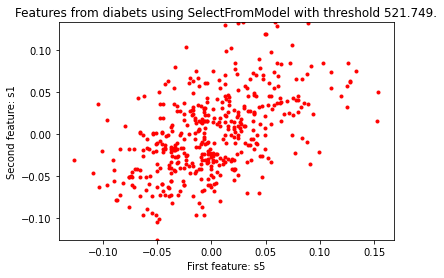

In [12]:
plt.title("Features from diabets using SelectFromModel with threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("First feature: {}".format(name_features[0]))
plt.ylabel("Second feature: {}".format(name_features[1]))
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# **Intrinsic Method**
## Tree-based Feature Selection

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

In [14]:
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [15]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  

array([0.09784413, 0.0552699 , 0.37433316, 0.47255281])

In [16]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape               

(150, 2)

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# **Filter Method**
## Univariate Feature Selection

Univariate feature selection works by selecting the best features based on **univariate statistical tests**. 

It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method:

**SelectKBest removes all but the  highest scoring features.**

For instance, we can perform a  test to the samples to retrieve only the two best features as follows:

In [17]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [18]:
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [19]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

These objects take as input a scoring function that returns univariate scores and p-values (or only scores for SelectKBest and SelectPercentile):

For regression: f_regression, mutual_info_regression

For classification: chi2, f_classif, mutual_info_classif

The methods based on F-test estimate the degree of linear dependency between two random variables. 

On the other hand, mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation.